In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data
# if data is less, NN will work extremely bad
# also, y should not be too big better between 0 and 1
x = np.linspace(-10,10,num=200)[:,None]   # [:,None] make the x.shape to be (30,1)
y = -0.1*x + 0.2*x**2 + 0.3*x**3 + 20*np.random.randn(200,1)
plt.plot(x,y,'o')
plt.show()

# data preprocessing
from sklearn.model_selection import train_test_split
x_data = x
y_data = y
x_train, x_test, y_train, y_test = train_test_split(x,y)


In [1]:
# ---------------------------------------------------------------------
# 1. a more flexible way to build NN:

x_dim = x_train.shape[1]
y_dim = y_train.shape[1]

x = tf.placeholder(tf.float32, [x_dim, None])
y = tf.placeholder(tf.float32, [y_dim, None])


n = [x_dim]
w = [None]
b = [None]
z = [None]
a = [x]    

    
p=1
n.append(20)
w.append(tf.Variable(tf.random_normal([n[p],n[p-1]])))
b.append(tf.Variable(tf.zeros([n[p],1])))
z.append(tf.matmul(w[p],a[p-1])+b[p])
a.append(tf.nn.tanh(z[p]))
# a.append(tf.nn.dropout(tf.nn.tanh(z[p]), keep_prob = 0.5))

p=p+1
n.append(5)
# w.append(tf.Variable(tf.random_normal([n[p],n[p-1]])))
# better initialization:
w.append(tf.Variable(tf.random_normal([n[p],n[p-1]])*(tf.sqrt(1/n[p-1]))))

b.append(tf.Variable(tf.zeros([n[p],1])))
z.append(tf.matmul(w[p],a[p-1])+b[p])
a.append(tf.nn.tanh(z[p]))
# a.append(tf.nn.dropout(tf.nn.tanh(z[p]), keep_prob = 0.8))

p=p+1
n.append(y_dim)
w.append(tf.Variable(tf.random_normal([n[p],n[p-1]])))
b.append(tf.Variable(tf.zeros([n[p],1])))
z.append(tf.matmul(w[p],a[p-1])+b[p])

# # batch normalization
# scale = tf.Variable(tf.ones([n[p],1]))
# shift = tf.Variable(tf.zeros([n[p],1]))
# fc_mean, fc_var = tf.nn.moments(z[p], axis = 1)
# z[p] = tf.nn.batch_normalization(z[p], z_mean, z_var, shift, scale, episilon=10e-5)

a.append(z[p])

loss = tf.reduce_mean(tf.square(a[p]-y)/10**3)

<Figure size 640x480 with 1 Axes>

# regularization

W0711 00:33:41.795242 16444 deprecation.py:323] From D:\virtualenvs\congyuml\lib\site-packages\tensorflow\python\util\tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


11.154662
6.3706183
3.944875
2.701841
2.022284
1.6029636
1.3827182
1.2110381
1.1186118
1.0774466


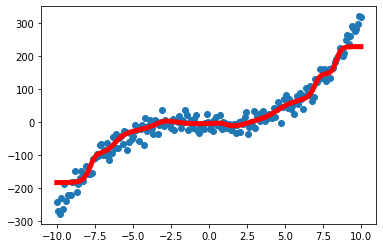

1.0407996
1.2184277


In [2]:
# here shows an example of how to use regularization

beta = 10**(-4)
for i in range(len(w)):
    if i > 0:
        loss += beta * tf.nn.l2_loss(w[i])

optimizer = tf.train.AdamOptimizer(0.1)
train     = optimizer.minimize(loss)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, feed_dict={x: x_train.T, y: y_train.T})
        if i%100 == 0:
            print(sess.run(loss, feed_dict={x: x_train.T, y: y_train.T}))
    y_predict  = sess.run(a[p], feed_dict={x: x_data.T})
    loss_train = sess.run(loss, feed_dict={x: x_train.T, y: y_train.T})
    loss_test  = sess.run(loss, feed_dict={x: x_test.T, y: y_test.T})

plt.scatter(x_data, y_data)
rl = sorted(list(zip(x_data.ravel(),y_predict.ravel())))
plt.plot([i for i,j in rl], [j for i,j in rl], 'r-', lw=5)
plt.show()

print(loss_train)
print(loss_test)

# dropout

In [ ]:
# here shows an example of how to use dropout
nb_n_1 = 500
w1   = tf.Variable(tf.truncated_normal([n_dim, nb_n_1], stddev = 0.1))
b1   = tf.Variable(tf.zeros([nb_n_1]) + 0.1)
l1_1 = tf.nn.tanh(tf.matmul(pic, w1) + b1)
l1   = tf.nn.dropout(l1_1, keep_prob=1)

# better initialization

In [ ]:
# let var(w) = 1/n
nb_n_2 = 300
w2 = tf.Variable(tf.truncated_normal([nb_n, nb_n_2], stddev = 1/np.sqrt(nb_n_2)))
b2 = tf.Variable(tf.zeros([nb_n_2]) + 0.1)
l2 = tf.nn.tanh(tf.matmul(l1, w2) + b2)
nb_n = nb_n_2

# in relu, let var(w) = 2/n
w2 = tf.Variable(tf.truncated_normal([nb_n, nb_n_2], stddev = 2/np.sqrt(nb_n_2)))
b2 = tf.Variable(tf.zeros([nb_n_2]) + 0.1)
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2)

# There are more complex stddevs.

# we can also tun this, if we want a fast starting NN
w2 = tf.Variable(tf.truncated_normal([nb_n, nb_n_2], stddev = fast_start_parameter/np.sqrt(nb_n_2)))
b2 = tf.Variable(tf.zeros([nb_n_2]) + 0.1)
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2)

In [ ]:
# ---------------------------------------------------------------------
# 4. mini-batch

# Norm batch